# Linear Regression using Tensorflow

In this notebook we are trying to understand the famous law of semiconductors i.e. Moore's Law.

Moore's Law states that the number of transistors on a microchip (integrated circuit) will approximately double every two years, while the cost of these chips will remain roughly constant. In other words, it suggests that computing power will increase exponentially over time, and the cost of that computing power will decrease.


Now this is an exponential problem 😵 How can we convert it into regression..????

We can by taking log on both sides:

Original formula : **`C = Ao * r^t`**

C = count (target variable)

Ao = Initial value of C when t = 0

t = time (input variable)

r = rate of growth


Taking log on both sides:
**`log(C) = log(r) * t + log(Ao)`**

## 1 . Starting with the imports

In [ ]:
# Import the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Get the Data

In [ ]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-09-14 11:40:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-09-14 11:40:54 (53.5 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
# Load the data
data = pd.read_csv('moore.csv', header = None).to_numpy()
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

## 3. Preparing the data

In [ ]:
# making an N x D
X = data[:,0].reshape(-1, 1)
y = data[:,1]

In [ ]:
arr = np.arange(10).reshape([5,2])
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
arr.reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

## 4. Visualize the data

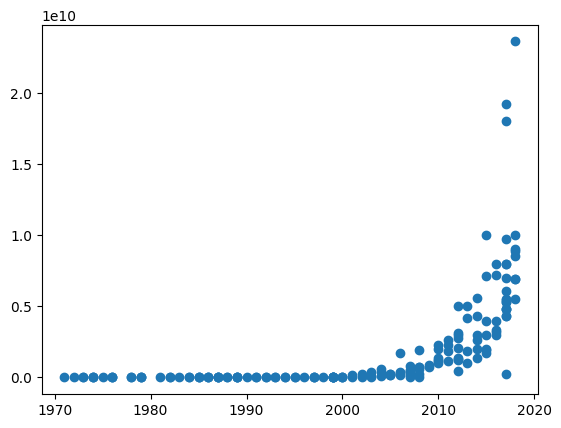

In [ ]:
# plot the data
plt.scatter(X,y)
plt.show()

We can see the data is growing exponentially on the above plot. To make it a Linear Regression problem we need to take log on both sides. It will make the data fall into  straight line.

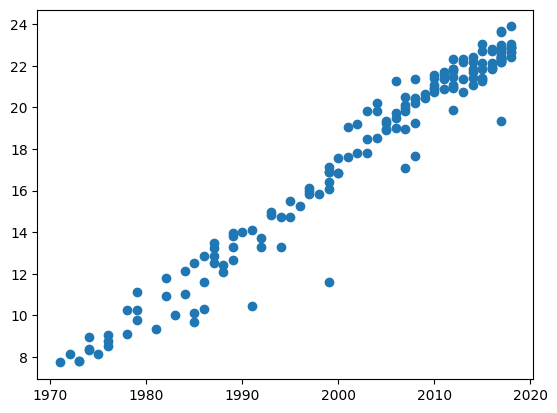

In [ ]:
# Let's take the log on both sides
Y = np.log(y)
plt.scatter(X, Y);

## 5. Preprocess the data

The most basic types of preprocessing involves mean centering the data, that is : `x - mean(x)` or standardizing the data that is : `X/std(x)`.

The goal of mean normalization is to make the data centered around zero and have a similar scale, which can be helpful in various machine learning algorithms, especially those sensitive to the scale of input features. This process can also improve the convergence of optimization algorithms.

In [ ]:
# Let's perform mean centering the data or normalizing the data
X = X - X.mean()

## 6. Build the model

In [ ]:
# Lets create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss = tf.keras.losses.MeanSquaredError(),
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9),
                metrics = ['mse'])

## 7. Creating a learning rate callback

In [ ]:
# Define a learing rate scheduler
def learning_rate_scheduler(epoch, learning_rate):
  """
  This function takes epoch and learning rate as it's parameters. It returns
  the learning rate to be used based on the number of epochs.
  """

  if epoch >= 50:
    return 0.0001

  else:
    return 0.001

# Let's create a learning rate callback for our scheduler
scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

## 8. Fit the model

In [ ]:
# Fit the model
history = model_1.fit(X, Y, epochs = 200, callbacks  = [scheduler])

Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 316.9594 - mse: 316.9594 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 332.3445 - mse: 332.3445 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 243.2590 - mse: 243.2590 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 212.4345 - mse: 212.4345 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 180.3390 - mse: 180.3390 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 121.8642 - mse: 121.8642 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 88.5448 - mse: 88.5448 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 62.7253 - mse: 62.7253 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 45.1789 - mse: 45.1789 - lr: 0.0010
Epoch 10/200
6/6 [=======

## 9. Evaluate the model

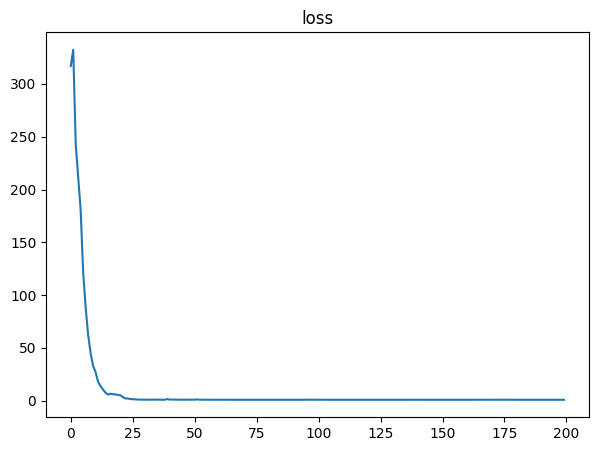

In [ ]:
# Plot the loss
plt.figure(figsize = (7,5))
plt.plot(history.history['loss'])
plt.title('loss')
plt.show();

In [ ]:
# Let's check the layers in our model
model_1.layers

In [ ]:
# Now let's check the weights learnt by the first layers of the model
model_1.layers[0].get_weights()

[array([[0.33894596]], dtype=float32), array([17.775587], dtype=float32)]

In [ ]:
# fetching the first item from the first array
a = model_1.layers[0].get_weights()[0][0,0]
a

0.33894596

In [ ]:
print('Transistor time to double: {} years'.format(round(np.log(2)/a)))

Transistor time to double: 2 years


6/6 [==============================] - 0s 3ms/step


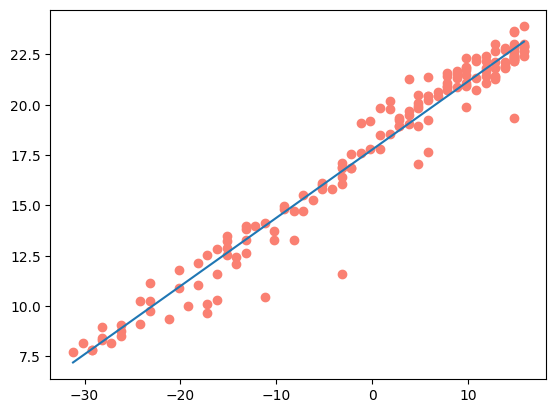

In [ ]:
# Visualzing model evaluation

yhat = model_1.predict(X)
plt.scatter(X, Y, color = 'salmon')
plt.plot(X, yhat)

In [ ]:
5# Manual calculation of predictions
# Get the weights
w, b = model_1.layers[0].get_weights()

# Reshape  X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) ---> (N x 1)
yhat2 = X.dot(w) + b

np.allclose(yhat, yhat2)

True

In [ ]:
X

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086],
       [-26.19753086],
       [-24.19753086],
       [-24.19753086],
       [-23.19753086],
       [-23.19753086],
       [-23.19753086],
       [-21.19753086],
       [-20.19753086],
       [-20.19753086],
       [-19.19753086],
       [-18.19753086],
       [-18.19753086],
       [-17.19753086],
       [-17.19753086],
       [-17.19753086],
       [-16.19753086],
       [-16.19753086],
       [-16.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-14.19753086],
       [-14.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-12.19753086],
       [-11.19753086],
       [-11.19753086],
       [-10.19753086],
       [-10.19753086],
       [ -9